# BERT-DialogueBot

Colab options: T4 GPU (The CUDA nvidia driver seems to work only with the GPU and not the TPU).

Source: https://medium.com/@shrinidhi.rm1990/simple-chatbot-using-bert-and-pytorch-part-1-2735643e0baa

Import Packages

In [189]:
!pip install tokenizers

In [190]:
!pip install sacremoses

In [191]:
!pip install sentencepiece

In [220]:
!pip install torchinfo

In [193]:
!pip install --no-dependencies Transformers==3

In [194]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
# specify GPU
device = torch.device("cuda")

Data Preparation

In [195]:
df_train = pd.read_parquet('sample_data/train-00000-of-00001-4eeea4877d4ce970.parquet')
df_train

,Name,Biography,Query,Response,Emotion
0,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on friendship?,Friendship is a bond stronger than blood.,Loyalty
1,Arcturus the Bounty Hunter,Arcturus is a fearless bounty hunter who has m...,What made you become a bounty hunter?,I believe in justice and making the world a sa...,Purpose
2,Elena Gilbert,Elena Gilbert is a teenage girl from the town ...,Can you tell me about Elena's role in Mystic F...,Elena is often caught in the middle.,Neutral
3,Arin the Cleric,Arin is a devoted follower of the god of light...,Have you ever faced a great challenge in your ...,"Yes, I've faced trials that tested my beliefs.",Determination
4,Scott McCall,Scott McCall is a teenage werewolf and the mai...,Can you tell me about your transformation?,"""Bitten, changed, became werewolf.""",Acceptance
...,...,...,...,...,...
1718,K2,K2 is a former special forces soldier turned b...,Have you ever felt sadness?,"""Sadness, rare, but understandable.""",Empathy
1719,Garrick Stonefist,Garrick is a dwarf paladin who comes from a lo...,What is Garrick's greatest strength?,Garrick's greatest strength is his unwavering ...,Fear
1720,Luna the Enchanter,Luna is a powerful enchanter who has mastered ...,What is your opinion on humans who fear magic?,"It's understandable, but magic can also bring ...",Understanding
1721,"Michael ""Mike"" Harper","Michael Harper, also known as ""Mike the Knife""...",What is Mike's ultimate goal in the apocalypse?,"Mike's goal is to find a safe haven, end the z...",Hope


In [196]:
by_name = df_train.groupby('Name')

In [197]:
by_name.get_group('Bikram')

,Name,Biography,Query,Response,Emotion
0,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on friendship?,Friendship is a bond stronger than blood.,Loyalty
34,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on wealth?,Wealth is power and freedom.,Ambition
58,Bikram,Bikram is a rough and tough smuggler from the ...,What is your ultimate goal in life?,My ultimate goal is to live life on my own terms.,Rebellion
197,Bikram,Bikram is a rough and tough smuggler from the ...,What is your favorite place to hide from the law?,My favorite place is the city's underworld.,Familiarity
223,Bikram,Bikram is a rough and tough smuggler from the ...,Have you ever been in love?,Love is a luxury I cannot afford.,Practicality
664,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on the law?,The law is a hindrance to my freedom.,Rebellion
690,Bikram,Bikram is a rough and tough smuggler from the ...,Have you ever faced an unbeatable opponent?,"I have faced many opponents, but I am always t...",Confidence
824,Bikram,Bikram is a rough and tough smuggler from the ...,Have you ever had to kill someone?,I have had to eliminate threats to my survival.,Practicality
1066,Bikram,Bikram is a rough and tough smuggler from the ...,Have you ever pulled a job alone?,I have pulled many jobs alone.,Independence
1127,Bikram,Bikram is a rough and tough smuggler from the ...,Can you tell me about your biggest score?,My biggest score was a shipment of gold.,Pride


In [198]:
by_name.get_group('Bikram')['Emotion'].value_counts()

Confidence       4
Loyalty          2
Rebellion        2
Familiarity      2
Practicality     2
Ambition         1
Independence     1
Pride            1
Vulnerability    1
Determination    1
Anticipation     1
Anger            1
Disgust          1
Name: Emotion, dtype: int64

In [199]:
by_name.get_group('Bikram')['Emotion'].count()

20

In [200]:
data = by_name.get_group('Bikram').to_dict()

In [201]:
data['Query']

{0: 'What is your opinion on friendship?',
 34: 'What is your opinion on wealth?',
 58: 'What is your ultimate goal in life?',
 197: 'What is your favorite place to hide from the law?',
 223: 'Have you ever been in love?',
 664: 'What is your opinion on the law?',
 690: 'Have you ever faced an unbeatable opponent?',
 824: 'Have you ever had to kill someone?',
 1066: 'Have you ever pulled a job alone?',
 1127: 'Can you tell me about your biggest score?',
 1141: 'What is your biggest weakness?',
 1175: 'What is your preferred weapon?',
 1220: 'Have you ever been in prison?',
 1259: 'What do you think of your partners in crime?',
 1417: 'Have you ever been caught by the police?',
 1489: 'What is your favorite pastime?',
 1521: 'Have you ever been double-crossed?',
 1603: 'What do you do when things get tough?',
 1639: 'Have you ever faced a rival gang?',
 1706: 'What is your opinion on the government?'}

In [202]:
data['Response']

{0: 'Friendship is a bond stronger than blood.',
 34: 'Wealth is power and freedom.',
 58: 'My ultimate goal is to live life on my own terms.',
 197: "My favorite place is the city's underworld.",
 223: 'Love is a luxury I cannot afford.',
 664: 'The law is a hindrance to my freedom.',
 690: 'I have faced many opponents, but I am always the victor.',
 824: 'I have had to eliminate threats to my survival.',
 1066: 'I have pulled many jobs alone.',
 1127: 'My biggest score was a shipment of gold.',
 1141: 'My biggest weakness is my loyalty to my friends.',
 1175: 'My preferred weapon is a revolver.',
 1220: 'I have been in prison, but I always escape.',
 1259: 'My partners are my family.',
 1417: 'I have been caught, but I always find a way out.',
 1489: 'My favorite pastime is planning my next score.',
 1521: 'I have been double-crossed, but I always get my revenge.',
 1603: 'I use my wit to get out of trouble.',
 1639: 'I have faced many rival gangs and emerged victorious.',
 1706: 'Th

In [203]:
data['Emotion']

{0: 'Loyalty',
 34: 'Ambition',
 58: 'Rebellion',
 197: 'Familiarity',
 223: 'Practicality',
 664: 'Rebellion',
 690: 'Confidence',
 824: 'Practicality',
 1066: 'Independence',
 1127: 'Pride',
 1141: 'Vulnerability',
 1175: 'Familiarity',
 1220: 'Determination',
 1259: 'Loyalty',
 1417: 'Confidence',
 1489: 'Anticipation',
 1521: 'Anger',
 1603: 'Confidence',
 1639: 'Confidence',
 1706: 'Disgust'}

In [205]:
emotion = {}
for id, _emotion in data['Emotion'].items():
  if not _emotion in emotion:
    emotion[_emotion] = []
  emotion[_emotion].append(data['Response'][id])

In [206]:
emotion

{'Loyalty': ['Friendship is a bond stronger than blood.',
  'My partners are my family.'],
 'Ambition': ['Wealth is power and freedom.'],
 'Rebellion': ['My ultimate goal is to live life on my own terms.',
  'The law is a hindrance to my freedom.'],
 'Familiarity': ["My favorite place is the city's underworld.",
  'My preferred weapon is a revolver.'],
 'Practicality': ['Love is a luxury I cannot afford.',
  'I have had to eliminate threats to my survival.'],
 'Confidence': ['I have faced many opponents, but I am always the victor.',
  'I have been caught, but I always find a way out.',
  'I use my wit to get out of trouble.',
  'I have faced many rival gangs and emerged victorious.'],
 'Independence': ['I have pulled many jobs alone.'],
 'Pride': ['My biggest score was a shipment of gold.'],
 'Vulnerability': ['My biggest weakness is my loyalty to my friends.'],
 'Determination': ['I have been in prison, but I always escape.'],
 'Anticipation': ['My favorite pastime is planning my nex

In [207]:
data = {}
data["intents"] = []

for _emotion in emotion.keys():
  _data = {}
  _data["tag"] = _emotion
  _data["responses"] = emotion[_emotion]
  data["intents"].append(_data)

In [208]:
data

{'intents': [{'tag': 'Loyalty',
   'responses': ['Friendship is a bond stronger than blood.',
    'My partners are my family.']},
  {'tag': 'Ambition', 'responses': ['Wealth is power and freedom.']},
  {'tag': 'Rebellion',
   'responses': ['My ultimate goal is to live life on my own terms.',
    'The law is a hindrance to my freedom.']},
  {'tag': 'Familiarity',
   'responses': ["My favorite place is the city's underworld.",
    'My preferred weapon is a revolver.']},
  {'tag': 'Practicality',
   'responses': ['Love is a luxury I cannot afford.',
    'I have had to eliminate threats to my survival.']},
  {'tag': 'Confidence',
   'responses': ['I have faced many opponents, but I am always the victor.',
    'I have been caught, but I always find a way out.',
    'I use my wit to get out of trouble.',
    'I have faced many rival gangs and emerged victorious.']},
  {'tag': 'Independence', 'responses': ['I have pulled many jobs alone.']},
  {'tag': 'Pride', 'responses': ['My biggest score 

In [209]:
df = by_name.get_group('Bikram')

In [210]:
# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['Emotion'])
# check class distribution
df['label'].value_counts(normalize = True)

<ipython-input-210-c6f7a85cdd17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = le.fit_transform(df['Emotion'])


3     0.20
8     0.10
11    0.10
6     0.10
9     0.10
0     0.05
7     0.05
10    0.05
12    0.05
4     0.05
2     0.05
1     0.05
5     0.05
Name: label, dtype: float64

In [211]:
train_text, train_labels = df['Query'], df['label']

Modeling

In [214]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained('distilbert-base-uncased')

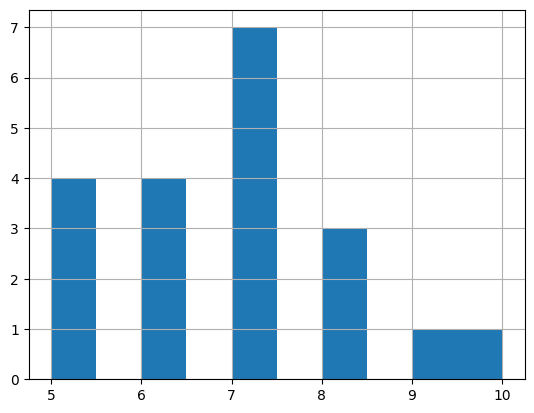

In [215]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)
# Based on the histogram we are selecting the max len as 8
max_seq_len = 8

In [216]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [217]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

In [218]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 16
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
#train_sampler = train_data
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [219]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):
       super(BERT_Arch, self).__init__()
       self.bert = bert

       # dropout layer
       self.dropout = nn.Dropout(0.2)

       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,13)
       #self.fc3 = nn.Linear(256,5)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]

      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)

      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)

      # apply softmax activation
      x = self.softmax(x)
      return x

In [221]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
model = model.to(device)
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           3,341
├─LogSoftmax: 1-7                                       --
Total 

In [222]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

In [223]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
print(class_wts)

[1.53846154 1.53846154 1.53846154 0.38461538 1.53846154 1.53846154
 0.76923077 1.53846154 0.76923077 0.76923077 1.53846154 0.76923077
 1.53846154]


In [224]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights)

In [225]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
# number of training epochs
epochs = 200
# We can also use learning rate scheduler to achieve better results
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [226]:
# function to train the model
def train():

  model.train()

  total_loss = 0

  # empty list to save model predictions
  total_preds=[]
  print("Done")
  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step,    len(train_dataloader)))
    # push the batch to gpu
    batch = [r.to(device) for r in batch]
    sent_id, mask, labels = batch
    # get model predictions for the current batch

    preds = model(sent_id, mask)


    # compute the loss between actual and predicted values
    #print("train DONE")
    #print(len(labels), len(preds))

    loss = cross_entropy(preds, labels)
    print("Loss DONE")

    # add on to the total loss
    total_loss = total_loss + loss.item()
    # backward pass to calculate the gradients
    loss.backward()
    # clip the the gradients to 1.0. It helps in preventing the    exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
    # clear calculated gradients
    optimizer.zero_grad()

    # We are not using learning rate scheduler as of now
    # lr_sch.step()
    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
    # append the model predictions
    total_preds.append(preds)
  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)
  #returns the loss and predictions

  return avg_loss, total_preds

In [227]:
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss,_ = train()

    # append training and validation loss
    train_losses.append(train_loss)
    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
print(f'\nTraining Loss: {train_loss:.3f}')


 Epoch 1 / 200
Done
Loss DONE
Loss DONE

 Epoch 2 / 200
Done
Loss DONE
Loss DONE

 Epoch 3 / 200
Done
Loss DONE
Loss DONE

 Epoch 4 / 200
Done
Loss DONE
Loss DONE

 Epoch 5 / 200
Done
Loss DONE
Loss DONE

 Epoch 6 / 200
Done
Loss DONE
Loss DONE

 Epoch 7 / 200
Done
Loss DONE
Loss DONE

 Epoch 8 / 200
Done
Loss DONE
Loss DONE

 Epoch 9 / 200
Done
Loss DONE
Loss DONE

 Epoch 10 / 200
Done
Loss DONE
Loss DONE

 Epoch 11 / 200
Done
Loss DONE
Loss DONE

 Epoch 12 / 200
Done
Loss DONE
Loss DONE

 Epoch 13 / 200
Done
Loss DONE
Loss DONE

 Epoch 14 / 200
Done
Loss DONE
Loss DONE

 Epoch 15 / 200
Done
Loss DONE
Loss DONE

 Epoch 16 / 200
Done
Loss DONE
Loss DONE

 Epoch 17 / 200
Done
Loss DONE
Loss DONE

 Epoch 18 / 200
Done
Loss DONE
Loss DONE

 Epoch 19 / 200
Done
Loss DONE
Loss DONE

 Epoch 20 / 200
Done
Loss DONE
Loss DONE

 Epoch 21 / 200
Done
Loss DONE
Loss DONE

 Epoch 22 / 200
Done
Loss DONE
Loss DONE

 Epoch 23 / 200
Done
Loss DONE
Loss DONE

 Epoch 24 / 200
Done
Loss DONE
Loss DONE



In [229]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()

 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])

 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 print('Intent Identified: ', le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]

def get_response(message):
  intent = get_prediction(message)
  for i in data['intents']:
    if i["tag"] == intent:
      result = random.choice(i["responses"])
      break
  print(f"Response : {result}")
  return "Intent: "+ intent + '\n' + "Response: " + result

In [230]:
get_response("what is your hobby")

Intent Identified:  Anticipation
Response : My favorite pastime is planning my next score.


'Intent: Anticipation\nResponse: My favorite pastime is planning my next score.'

In [231]:
get_response("What is your weakness?")

Intent Identified:  Confidence
Response : I have faced many rival gangs and emerged victorious.


'Intent: Confidence\nResponse: I have faced many rival gangs and emerged victorious.'

In [232]:
get_response("Did police ever catch you?")

Intent Identified:  Determination
Response : I have been in prison, but I always escape.


'Intent: Determination\nResponse: I have been in prison, but I always escape.'